In [1]:
import seaborn as sns
import metapack as mp
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 
from geoid.censusnames import stusab

%matplotlib inline
sns.set_context('notebook')
mp.jupyter.init()

from shapely.geometry import Point


In [2]:
#pkg = mp.jupyter.open_package()
pkg = mp.jupyter.open_source_package()
pkg

# Starbucks Locations
`chrismeller.github.com-starbucks-2.1.1` Last Update: 2021-02-25T23:26:29

_A list of Starbucks locations, scraped from the web in 2017_


Starbucks locations scraped from the Starbucks website by Chris Meller. From the original README: 


    Contains a single commit for each day that batches up all changes to 
    the Starbucks dataset as a CSV file.

    Deletes will obviously be stores that seem to have closed and adds 
    are new stores that have opened.

    This is a work in progress. There is additional data that needs 
    to be included in this dataset and it needs to get properly automated 
    so we hav e a regular commit daily at a particular time.
## Documentation Links

* [Source](https://github.com/chrismeller/StarbucksLocations) Github page for the datafile source

 
## Notes

* Version 2.1.1 updates the geocoding with full-precision lat/lon
## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* ** [all_starbucks](https://github.com/chrismeller/StarbucksLocations/raw/master/stores.csv)**. List of Starbucks locations.
* ** [us_starbucks](notebooks/convert.ipynb#ussb)**. Geo file of starbucks in the US

## References
<ul><li> <strong>states</string>, <em>censusgeo://2019/5/US/state</em>. US States</li><li> <strong>geocodes</string>, <em>data/geocodes.csv</em>. geocoded addresses</li><ul>

In [3]:
df = pkg.resource('all_starbucks').dataframe().dropna(subset=['Longitude','Latitude'])
gc  = pkg.reference('geocodes').dataframe()

/Users/eric/proj/code-projects/radius-search/demosearch/venv/lib/python3.7/site-packages/metapack/terms.py:698: UserWarning: Failed to set parse dates . Trying again without parse_dates configuration
  warnings.warn('Failed to set parse dates . Trying again without parse_dates configuration')


In [4]:
df = df.rename(columns={'Latitude':'Source_Latitude', 'Longitude':'Source_Longitude'})
df.head()

,Id,StarbucksId,Name,BrandName,StoreNumber,PhoneNumber,OwnershipType,Street1,Street2,Street3,...,CountrySubdivisionCode,CountryCode,PostalCode,Source_Longitude,Source_Latitude,TimezoneOffset,TimezoneId,TimezoneOlsonId,FirstSeen,LastSeen
0,1f2d204f-e773-4361-9158-0008307dbd5e,10357,Target Virginia T-847,Starbucks,76666-97597,218-741-6603,LS,1001 13th St S,NaN,NaN,...,MN,US,557923254,-92.55,47.51,-360,Central Standard Time,GMT-06:00 America/Chicago,12/8/2013 5:41:59 PM,2/3/2017 12:00:00 AM
1,49455e22-49e9-461f-912c-00092386eaee,6557,PDX A 2,Starbucks,75916-104381,503-284-4008,LS,"7000 NE Airport Way, MB#3",NaN,NaN,...,OR,US,972181031,-122.59,45.59,-480,Pacific Standard Time,GMT-08:00 America/Los_Angeles,12/8/2013 5:41:59 PM,2/3/2017 12:00:00 AM
2,1316ebf8-ee4a-479d-a11d-000964af367b,1010600,235 Bourke Street,Starbucks,25294-240419,NaN,LS,235-251 Bourke St,"Shops 5,6 & 10",NaN,...,VIC,AU,3000,144.97,-37.81,660,AUS Eastern Standard Time,GMT+10:00 Australia/Melbourne,10/8/2014 12:00:00 AM,2/3/2017 12:00:00 AM
3,1b8b9007-4587-4942-bf29-000a0af78161,1014921,Oasis Al-Kharj,Starbucks,27350-247327,NaN,LS,King Abdullah Rd,Al Khuzama,NaN,...,01,SA,NaN,47.27,24.13,180,Arab Standard Time,GMT+03:00 Asia/Riyadh,6/21/2016 12:00:00 AM,2/3/2017 12:00:00 AM
4,072752df-b30b-4f3f-a9b8-000ae32f8666,14667,Target Trumbull T-1956,Starbucks,76306-93245,203-455-0102,LS,120 Hawley Ln,NaN,NaN,...,CT,US,066115347,-73.15,41.23,-300,Eastern Standard Time,GMT-05:00 America/New_York,12/8/2013 5:41:59 PM,2/3/2017 12:00:00 AM


In [5]:
# Merge in the new gocodes, because the old ones are too course
df = df.merge(gc.rename(columns={'id':'Id'}))

In [6]:
df.head()

,Id,StarbucksId,Name,BrandName,StoreNumber,PhoneNumber,OwnershipType,Street1,Street2,Street3,...,Source_Longitude,Source_Latitude,TimezoneOffset,TimezoneId,TimezoneOlsonId,FirstSeen,LastSeen,geocoder,lat,lon
0,1f2d204f-e773-4361-9158-0008307dbd5e,10357,Target Virginia T-847,Starbucks,76666-97597,218-741-6603,LS,1001 13th St S,NaN,NaN,...,-92.55,47.51,-360,Central Standard Time,GMT-06:00 America/Chicago,12/8/2013 5:41:59 PM,2/3/2017 12:00:00 AM,mapquest,47.511105,-92.549222
1,49455e22-49e9-461f-912c-00092386eaee,6557,PDX A 2,Starbucks,75916-104381,503-284-4008,LS,"7000 NE Airport Way, MB#3",NaN,NaN,...,-122.59,45.59,-480,Pacific Standard Time,GMT-08:00 America/Los_Angeles,12/8/2013 5:41:59 PM,2/3/2017 12:00:00 AM,open_cage,45.589820,-122.591343
2,072752df-b30b-4f3f-a9b8-000ae32f8666,14667,Target Trumbull T-1956,Starbucks,76306-93245,203-455-0102,LS,120 Hawley Ln,NaN,NaN,...,-73.15,41.23,-300,Eastern Standard Time,GMT-05:00 America/New_York,12/8/2013 5:41:59 PM,2/3/2017 12:00:00 AM,mapbox,41.232538,-73.152538
3,d387414f-827a-49b1-8002-000ced29086e,16329,Albertsons-Oceanside #6733,Starbucks,73636-67161,760-729-3468,LS,3450 Marron Rd,NaN,NaN,...,-117.30,33.18,-480,Pacific Standard Time,GMT-08:00 America/Los_Angeles,12/8/2013 5:41:59 PM,2/3/2017 12:00:00 AM,mapquest,33.179252,-117.296418
4,c247cc83-e908-4046-a9e1-000de0f73ea5,1015467,SEC Lincoln & Yosemite - Lone Tree,Starbucks,27851-193845,(720) 467-4703,CO,9998 Commons St.,NaN,NaN,...,-104.88,39.54,-420,Mountain Standard Time,GMT-07:00 America/Denver,8/16/2016 12:00:00 AM,2/3/2017 12:00:00 AM,mapquest,39.535682,-104.880233


In [11]:
states = pkg.reference('states').geoframe().to_crs(4326)[['geoid','geometry']]


In [8]:
df['geometry'] = df.apply(lambda r: Point(r.lon, r.lat), axis=1)
df = gpd.GeoDataFrame(df, crs=4326)
ussb = gpd.overlay(df, states) # Starbucks in the US
ussb.head()

,Id,StarbucksId,Name,BrandName,StoreNumber,PhoneNumber,OwnershipType,Street1,Street2,Street3,...,TimezoneOffset,TimezoneId,TimezoneOlsonId,FirstSeen,LastSeen,geocoder,lat,lon,geoid,geometry
0,1f2d204f-e773-4361-9158-0008307dbd5e,10357,Target Virginia T-847,Starbucks,76666-97597,218-741-6603,LS,1001 13th St S,NaN,NaN,...,-360,Central Standard Time,GMT-06:00 America/Chicago,12/8/2013 5:41:59 PM,2/3/2017 12:00:00 AM,mapquest,47.511105,-92.549222,04000US27,POINT (-92.54922 47.51111)
1,4fd3ed5a-efa4-4a20-b11d-0148c42cb029,1006159,Target Vadnais Heights T-751,Starbucks,20341-204767,651-483-9637,LS,975 County Rd E,NaN,NaN,...,-360,Central Standard Time,GMT-06:00 America/Chicago,12/8/2013 5:41:59 PM,2/3/2017 12:00:00 AM,open_cage,45.050410,-93.061545,04000US27,POINT (-93.06154 45.05041)
2,0f7464b4-0891-4ac5-b1c7-021326702910,1008940,Highway 169 and Freeport-Elk River,Starbucks,20689-206848,7634413991,CO,19179 Freeport Ave,A,NaN,...,-360,Central Standard Time,GMT-06:00 America/Chicago,8/27/2014 12:00:00 AM,2/3/2017 12:00:00 AM,open_cage,45.319902,-93.564261,04000US27,POINT (-93.56426 45.31990)
3,0909786f-7ca8-4f88-91a0-02bbca3d7b97,14598,St. Paul-Grand Ave & Oxford St,Starbucks,10156-99311,651-221-4465,CO,1062 Grand Ave.,NaN,NaN,...,-360,Central Standard Time,GMT-06:00 America/Chicago,12/8/2013 5:41:59 PM,2/3/2017 12:00:00 AM,mapquest,44.939874,-93.144947,04000US27,POINT (-93.14495 44.93987)
4,8b2be36a-c175-4dcb-b344-030b17508406,12449,Target Minneapolis T-1375,Starbucks,72669-48339,763-440-9390,LS,900 Nicollet Mall,NaN,NaN,...,-360,Central Standard Time,GMT-06:00 America/Chicago,12/8/2013 5:41:59 PM,2/3/2017 12:00:00 AM,open_cage,44.970518,-93.277707,04000US27,POINT (-93.27771 44.97052)


<AxesSubplot:>

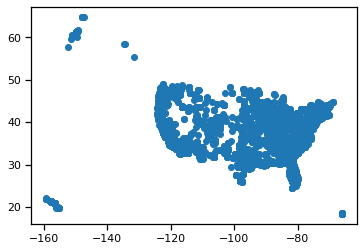

In [9]:
ussb.plot()

In [10]:
ussb.head().T

,0,1,2,3,4
Id,1f2d204f-e773-4361-9158-0008307dbd5e,4fd3ed5a-efa4-4a20-b11d-0148c42cb029,0f7464b4-0891-4ac5-b1c7-021326702910,0909786f-7ca8-4f88-91a0-02bbca3d7b97,8b2be36a-c175-4dcb-b344-030b17508406
StarbucksId,10357,1006159,1008940,14598,12449
Name,Target Virginia T-847,Target Vadnais Heights T-751,Highway 169 and Freeport-Elk River,St. Paul-Grand Ave & Oxford St,Target Minneapolis T-1375
BrandName,Starbucks,Starbucks,Starbucks,Starbucks,Starbucks
StoreNumber,76666-97597,20341-204767,20689-206848,10156-99311,72669-48339
PhoneNumber,218-741-6603,651-483-9637,7634413991,651-221-4465,763-440-9390
OwnershipType,LS,LS,CO,CO,LS
Street1,1001 13th St S,975 County Rd E,19179 Freeport Ave,1062 Grand Ave.,900 Nicollet Mall
Street2,NaN,NaN,A,NaN,NaN
Street3,NaN,NaN,NaN,NaN,NaN
